We began the problem by creating methods to compute statistics like mean, standard deviation, probabilities, etc

In [135]:
import random
import math
import scipy.io
import numpy as np
import pandas as pd

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
def multiplyElementWiseProbabilityandReturnMax(list1,list2):
    mulList = [a*b for a,b in zip(list1,list2)]
    return giveClass(mulList)

def giveClass(listOfProbs):
    return np.argmax(listOfProbs)+1

def reducedProbabilities(df1,df2,df1mean,df1std,df2mean,df2std,start=100,stop=1000):
    predDF = pd.DataFrame(columns=['class1','class2', 'class3','class4', 'class5'])
   
    for i in range(start,stop):
        listOfProbabilityList = []
        for j in range(0,5):
            
            d1 = df1.iloc[i][j]
            d2 = df2.iloc[i][j]
            listOfProbs1 = probable_Class(d1,df1mean,df1std)
            listOfProbs2 = probable_Class(d2,df2mean,df2std)
            maxList = multiplyElementWiseProbabilityandReturnMax(listOfProbs1,listOfProbs2)
            listOfProbabilityList.append(maxList)
        predDF.loc[i] = listOfProbabilityList
    return predDF

def overallErrorRate(probability_DF):
    class_Counter = []
    for i in range(5):
        c = probability_DF[probability_DF.iloc[:,i] == i+1].iloc[:,i].count()
        class_Counter.append(c)
    totalCorrectPrediction = np.sum(class_Counter)       
    totalPredictions = probability_DF.size
    errorRate = (totalPredictions-totalCorrectPrediction)/totalPredictions
    return errorRate 
   
def probable_Class(measured_data, mean, deviation):
    class_Probabilities = []
    for i in range(5):
        class_Probabilities.append(probability_Compute(measured_data,mean[i],deviation[i]))
    return class_Probabilities        
  
def probability_Compute(measured_data, mean, deviation):
    exponent = math.exp(-(math.pow(measured_data-mean,2)/(2*math.pow(deviation,2))))
    return (1/(math.sqrt(2*math.pi)*deviation))*exponent
    
def accuracy_Compute(probability_DF):
    class_Counter = []
    for i in range(5):
        c = probability_DF[probability_DF.iloc[:,i] == i+1].iloc[:,i].count()
        class_Counter.append(c)
    correct_Predictions = np.sum(class_Counter)       
    total_Predictions = probability_DF.size
    accuracy = correct_Predictions/total_Predictions
    return accuracy    

Case 1 : X=F1

In [137]:
mat = scipy.io.loadmat('data.mat')
f1=mat['F1']
f2=mat['F2']
dataset_f1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
dataset_f2=pd.DataFrame({'C1':f2[:,0],'C2':f2[:,1],'C3':f2[:,2],'C4':f2[:,3],'C5':f2[:,4]})
train=dataset_f1.iloc[0:100,:]
test=dataset_f1.iloc[100:,:]
tr=train.iloc[:,0].append(train.iloc[:,1])
tr=tr.append(train.iloc[:,2])
tr=tr.append(train.iloc[:,3])
tr=tr.append(train.iloc[:,4])
data_train=tr.to_frame()
c1t=[1]*100
c2t=[2]*100
c3t=[3]*100
c4t=[4]*100
c5t=[5]*100
labt=c1t+c2t+c3t+c4t+c5t
data_train["Class"]=labt
l1=[]
l2=[]
for i in range(data_train.shape[0]):
    l1.append(tuple(data_train.iloc[i,:]))
        
dfnew=test.iloc[:,0].append(test.iloc[:,1])
dfnew=dfnew.append(test.iloc[:,2])
dfnew=dfnew.append(test.iloc[:,3])
dfnew=dfnew.append(test.iloc[:,4])
data=dfnew.to_frame()
c1=[1]*900
c2=[2]*900
c3=[3]*900
c4=[4]*900
c5=[5]*900
lab=c1+c2+c3+c4+c5
data["Class"]=lab
for i in range(data.shape[0]):
    l2.append(tuple(data.iloc[i,:]))
summaries = summarizeByClass(l1)
# test model
predictions = getPredictions(summaries, l2)
accuracy = getAccuracy(l2, predictions)
print("Accuracy for X=F1 is ",accuracy)

Accuracy for X=F1 is  53.0


Accuracy for X=F1 is  53.0

Plotting F2 vs F1 with respect to the 5 classes

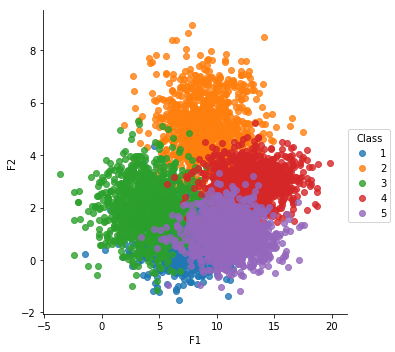

In [24]:
mat = scipy.io.loadmat('data.mat')
f1=mat['F1']
f2=mat['F2']
df1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
tr=df1.iloc[:,0].append(df1.iloc[:,1])
tr=tr.append(df1.iloc[:,2])
tr=tr.append(df1.iloc[:,3])
tr=tr.append(df1.iloc[:,4])
val_f1=list(tr)

df2 = pd.DataFrame({'C1':f2[:,0],'C2':f2[:,1],'C3':f2[:,2],'C4':f2[:,3],'C5':f2[:,4]})
tr2=df2.iloc[:,0].append(df2.iloc[:,1])
tr2=tr2.append(df2.iloc[:,2])
tr2=tr2.append(df2.iloc[:,3])
tr2=tr2.append(df2.iloc[:,4])
val_f2=list(tr2)

c1t=[1]*1000
c2t=[2]*1000
c3t=[3]*1000
c4t=[4]*1000
c5t=[5]*1000
class_val=c1t+c2t+c3t+c4t+c5t

d = {'F1': val_f1, 'F2': val_f2,'Class':class_val}
data_plot1 = pd.DataFrame(data=d)
data_plot1

import seaborn as sns
import matplotlib as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="F1", y="F2", data=data_plot1, fit_reg=False, hue='Class', legend=True)
  
#sns.plt.show()


Plotting F2 vs Z1

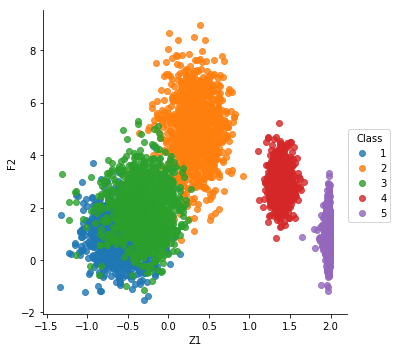

In [86]:
daf1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
for i in range(daf1.shape[0]):
    for j in range(daf1.shape[1]):
        daf1.iloc[i,j]=(daf1.iloc[i,j]-np.mean(daf1.iloc[i,:]))/np.std(daf1.iloc[i,:])
tr=daf1.iloc[:,0].append(daf1.iloc[:,1])
tr=tr.append(daf1.iloc[:,2])
tr=tr.append(daf1.iloc[:,3])
tr=tr.append(daf1.iloc[:,4])
val_z1=list(tr)

df2 = pd.DataFrame({'C1':f2[:,0],'C2':f2[:,1],'C3':f2[:,2],'C4':f2[:,3],'C5':f2[:,4]})
tr2=df2.iloc[:,0].append(df2.iloc[:,1])
tr2=tr2.append(df2.iloc[:,2])
tr2=tr2.append(df2.iloc[:,3])
tr2=tr2.append(df2.iloc[:,4])
val_f2=list(tr2)

c1t=[1]*1000
c2t=[2]*1000
c3t=[3]*1000
c4t=[4]*1000
c5t=[5]*1000
class_val=c1t+c2t+c3t+c4t+c5t

d = {'Z1': val_z1, 'F2': val_f2,'Class':class_val}
data_plot1 = pd.DataFrame(data=d)
data_plot1

import seaborn as sns
import matplotlib as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Z1", y="F2", data=data_plot1, fit_reg=False, hue='Class', legend=True)
  
#sns.plt.show()

  

Case 2 : X = Z1

In [139]:

mat = scipy.io.loadmat('data.mat')
f1=mat['F1']
f2=mat['F2']
daf1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
for i in range(daf1.shape[0]):
    for j in range(daf1.shape[1]):
        daf1.iloc[i,j]=(daf1.iloc[i,j]-np.mean(daf1.iloc[i,:]))/np.std(daf1.iloc[i,:])
tr=daf1.iloc[:,0].append(daf1.iloc[:,1])
tr=tr.append(daf1.iloc[:,2])
tr=tr.append(daf1.iloc[:,3])
tr=tr.append(daf1.iloc[:,4])

train=daf1.iloc[0:100,:]
test=daf1.iloc[100:,:]
tr=train.iloc[:,0].append(train.iloc[:,1])
tr=tr.append(train.iloc[:,2])
tr=tr.append(train.iloc[:,3])
tr=tr.append(train.iloc[:,4])
data_train=tr.to_frame()
c1t=[1]*100
c2t=[2]*100
c3t=[3]*100
c4t=[4]*100
c5t=[5]*100
labt=c1t+c2t+c3t+c4t+c5t
data_train["Class"]=labt
l1=[]
l2=[]
for i in range(data_train.shape[0]):
    l1.append(tuple(data_train.iloc[i,:]))
        
dfnew=test.iloc[:,0].append(test.iloc[:,1])
dfnew=dfnew.append(test.iloc[:,2])
dfnew=dfnew.append(test.iloc[:,3])
dfnew=dfnew.append(test.iloc[:,4])
data_1=dfnew.to_frame()
c1=[1]*900
c2=[2]*900
c3=[3]*900
c4=[4]*900
c5=[5]*900
lab=c1+c2+c3+c4+c5
data_1["Class"]=lab
for i in range(data_1.shape[0]):
    l2.append(tuple(data_1.iloc[i,:]))
summaries = summarizeByClass(l1)
    # test model
predictions = getPredictions(summaries, l2)
accuracy = getAccuracy(l2, predictions)
print("Accuracy for X=Z1 is",accuracy)


Accuracy for X=Z1 is 85.97777777777777


Accuracy for X=Z1 is 85.977

Case 3 : X = F2

In [121]:
dataset_f1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
dataset_f2=pd.DataFrame({'C1':f2[:,0],'C2':f2[:,1],'C3':f2[:,2],'C4':f2[:,3],'C5':f2[:,4]})
train=dataset_f2.iloc[0:100,:]
test=dataset_f2.iloc[100:,:]
tr=train.iloc[:,0].append(train.iloc[:,1])
tr=tr.append(train.iloc[:,2])
tr=tr.append(train.iloc[:,3])
tr=tr.append(train.iloc[:,4])
data_train=tr.to_frame()
c1t=[1]*100
c2t=[2]*100
c3t=[3]*100
c4t=[4]*100
c5t=[5]*100
labt=c1t+c2t+c3t+c4t+c5t
data_train["Class"]=labt
l1=[]
l2=[]
for i in range(data_train.shape[0]):
    l1.append(tuple(data_train.iloc[i,:]))
        
dfnew=test.iloc[:,0].append(test.iloc[:,1])
dfnew=dfnew.append(test.iloc[:,2])
dfnew=dfnew.append(test.iloc[:,3])
dfnew=dfnew.append(test.iloc[:,4])
data_2=dfnew.to_frame()
c1=[1]*900
c2=[2]*900
c3=[3]*900
c4=[4]*900
c5=[5]*900
lab=c1+c2+c3+c4+c5
data_2["Class"]=lab
for i in range(data_2.shape[0]):
    l2.append(tuple(data_2.iloc[i,:]))
summaries = summarizeByClass(l1)
    # test model
predictions = getPredictions(summaries, l2)
accuracy = getAccuracy(l2, predictions)
print("Accuracy for X=F2 is",accuracy)



Accuracy for X=F2 is 55.08888888888889


Accuracy for X=F2 is 55.08888888888889

Case 4 : X=[Z1,F2]

In [138]:
dataset_f1 = pd.DataFrame({'C1':f1[:,0],'C2':f1[:,1],'C3':f1[:,2],'C4':f1[:,3],'C5':f1[:,4]})
for i in range(dataset_f1.shape[0]):
    for j in range(dataset_f1.shape[1]):
        dataset_f1.iloc[i,j]=(dataset_f1.iloc[i,j]-np.mean(dataset_f1.iloc[i,:]))/np.std(dataset_f1.iloc[i,:])

dataset_f2=pd.DataFrame({'C1':f2[:,0],'C2':f2[:,1],'C3':f2[:,2],'C4':f2[:,3],'C5':f2[:,4]})
mean_Z1 = dataset_f1[0:100].mean(axis = 0)
stdDev_Z1 = dataset_f1[0:100].std(axis = 0)
mean_F2 = dataset_f2[0:100].mean(axis = 0)
stdDev_F2 = dataset_f2[0:100].std(axis = 0)
mulDF = reducedProbabilities(dataset_f1,dataset_f2,mean_Z1,stdDev_Z1,mean_F2,stdDev_F2)

accuracyFormulDF = accuracy_Compute(mulDF)

errorFormulDF = overallErrorRate(mulDF)
print("Accuracy for X=[Z1,F2] is ",accuracy_Compute(mulDF)*100)

Accuracy for X=[Z1,F2] is  89.75555555555556


Accuracy for X=[Z1,F2] is 89.75